### Pytorch로 Logistic Regression 구현

In [5]:
# 학습 데이터 생성
import torch

x_train = torch.FloatTensor([[1], [2], [3], [4], [5], [2.5], [3.5], [0], [3.1], [2.7], [2.8], [2.9]])
y_train = torch.FloatTensor([[1], [1], [1], [0], [0], [0], [0], [1], [0], [1], [1], [1]])

In [2]:
# W, b 초기화
W = torch.zeros(1, 1)
b = torch.zeros(1, 1)

# Learning Rate 설정
lr = 1.0

In [4]:
# 반복횟수 설정
# W와 b의 requires_grad를 True로 설정
for epoch in range(3001):
  W.requires_grad_(True)
  b.requires_grad_(True)

  # Hypothesis, cost 설정
  hypothesis = torch.sigmoid(torch.mm(x_train, W) + b)
  cost = torch.mean(
      -y_train * torch.log(hypothesis)
      -(1 - y_train) * torch.log(1 - hypothesis)
  )

  # 경사 계산
  # W, b 업데이트
  cost.backward()
  with torch.no_grad() as grd:
    W = W - lr * W.grad
    b = b - lr * b.grad
  
  # 학습이 잘 되는지 확인하기 위한 내용 출력
  if epoch % 100 == 0:
    print(f'epoch: {epoch}, cost: {cost.item():.6f}, W: {W.squeeze():.6f}, b: {b.squeeze():.6f}')

epoch: 0, cost: 0.693147, W: -0.154167, b: 0.083333
epoch: 100, cost: 0.420221, W: -1.451281, b: 4.406925
epoch: 200, cost: 0.398721, W: -1.898433, b: 5.773750
epoch: 300, cost: 0.390820, W: -2.174322, b: 6.609553
epoch: 400, cost: 0.387009, W: -2.367329, b: 7.191599
epoch: 500, cost: 0.384924, W: -2.510626, b: 7.622530
epoch: 600, cost: 0.383699, W: -2.620779, b: 7.953164
epoch: 700, cost: 0.382944, W: -2.707397, b: 8.212804
epoch: 800, cost: 0.382463, W: -2.776597, b: 8.420023
epoch: 900, cost: 0.382149, W: -2.832521, b: 8.587363
epoch: 1000, cost: 0.381941, W: -2.878112, b: 8.723699
epoch: 1100, cost: 0.381801, W: -2.915530, b: 8.835541
epoch: 1200, cost: 0.381706, W: -2.946401, b: 8.927779
epoch: 1300, cost: 0.381641, W: -2.971979, b: 9.004180
epoch: 1400, cost: 0.381596, W: -2.993242, b: 9.067673
epoch: 1500, cost: 0.381565, W: -3.010968, b: 9.120598
epoch: 1600, cost: 0.381543, W: -3.025776, b: 9.164800
epoch: 1700, cost: 0.381528, W: -3.038172, b: 9.201797
epoch: 1800, cost: 0.3

### 여러가지 Optimizer 사용해보기

In [7]:
# pytorch에 이미 구현되어 있는 여러가지 optimizer
optimizer = torch.optim.SGD([W, b], lr=1.0)
# optimizer = torch.optim.Adam([W,b], lr=1.0)
# optimizer = torch.optim.Adadelta([W,b])
# optimizer = torch.optim.Adagrad([W,b])
# optimizer = torch.optim.RMSprop([W,b])

In [8]:
for epoch in range(3001):
  W.requires_grad_(True)
  b.requires_grad_(True)

  hypothesis = torch.sigmoid(torch.mm(x_train, W) + b)
  cost = torch.mean(
      -y_train * torch.log(hypothesis)
      -(1 - y_train) * torch.log(1 - hypothesis)
  )

  # 기존 (Gradient descent 직접 구현)
  # cost.backward()
  # with torch.no_grad() as grd:
  #   W = W - lr * W.grad
  #   b = b - lr * b.grad
  
  # 변경 후 (미리 구현된 모듈 사용)
  optimizer.zero_grad()
  cost.backward()
  optimizer.step()
  
  if epoch % 100 == 0:
    print(f'epoch: {epoch}, cost: {cost.item():.6f}, W: {W.squeeze():.6f}, b: {b.squeeze():.6f}')

epoch: 0, cost: 0.381491, W: -3.096674, b: 9.376342
epoch: 100, cost: 0.381491, W: -3.097791, b: 9.379672
epoch: 200, cost: 0.381491, W: -3.098733, b: 9.382483
epoch: 300, cost: 0.381491, W: -3.099529, b: 9.384856
epoch: 400, cost: 0.381491, W: -3.100201, b: 9.386860
epoch: 500, cost: 0.381491, W: -3.100768, b: 9.388552
epoch: 600, cost: 0.381491, W: -3.101247, b: 9.389980
epoch: 700, cost: 0.381491, W: -3.101651, b: 9.391188
epoch: 800, cost: 0.381491, W: -3.101992, b: 9.392203
epoch: 900, cost: 0.381491, W: -3.102282, b: 9.393066
epoch: 1000, cost: 0.381491, W: -3.102524, b: 9.393790
epoch: 1100, cost: 0.381491, W: -3.102730, b: 9.394404
epoch: 1200, cost: 0.381491, W: -3.102904, b: 9.394921
epoch: 1300, cost: 0.381491, W: -3.103051, b: 9.395362
epoch: 1400, cost: 0.381491, W: -3.103179, b: 9.395742
epoch: 1500, cost: 0.381491, W: -3.103278, b: 9.396037
epoch: 1600, cost: 0.381491, W: -3.103373, b: 9.396320
epoch: 1700, cost: 0.381491, W: -3.103440, b: 9.396523
epoch: 1800, cost: 0.3

### Matplotlib으로 결과 시각화

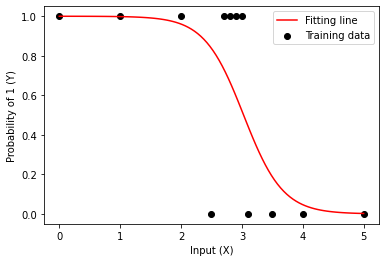

In [14]:
import matplotlib.pyplot as plt
W.requires_grad_(False)
b.requires_grad_(False)

X = torch.linspace(0, 5, 100).unsqueeze(1)
Y = torch.sigmoid(torch.mm(X, W) + b)

# 점과 선의 색 변경하기, 범례 달기
plt.scatter(x_train, y_train, c="black", label="Training data")
plt.plot(X, Y, c="#ff0000", label="Fitting line")
plt.legend()

# label 달기
plt.ylabel("Probability of 1 (Y)")
plt.xlabel("Input (X)")

plt.show()

### sklearn에서 Logistic Regression 사용

In [15]:
from sklearn.linear_model import LogisticRegression

x_train = [[1], [2], [3], [4], [5], [2.5], [3.5], [0], [3.1], [2.7], [2.8], [2.9]]
y_train = [1 ,1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1] # 입력 shape이 pytorch에서와 다름

model = LogisticRegression(penalty='none')
model.fit(x_train, y_train)

#W와 b에 해당하는 값 출력
print(model.coef_, model.intercept_)

# 새로운 x값이 주어질 때 y값 예측해보기
x_test = [[4.5],[1.1]]
test_result = model.predict(x_test)
print(test_result)

[[-3.10385806]] [9.39776831]
[0 1]
